## Generate figure 2a, 2b, 2c and 2d as shown in the manuscript

### Fig 2a

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../scGCO_code')

In [2]:
from scGCO_source import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3
%matplotlib inline

In [3]:
result_df=read_result_to_dataframe(
    '../../results/MouseOB/scGCO_results/Rep11_result_df.csv')
gco_df = result_df[result_df.fdr<0.01]
gco_df.shape

(481, 267)

In [4]:
de_df=pd.read_csv('../../results/MouseOB/SpatialDE_results/MOB_11_DE.csv')
de_df.shape

(67, 20)

In [5]:
spark = pd.read_csv('../../results/MouseOB/SPARK_results//Rep11_MOB_spark.csv')
spark.shape

(772, 3)

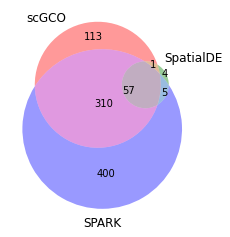

In [6]:
v=venn3(subsets=(set(gco_df.index),set(de_df.g.values),set(spark.genes)),set_labels=['scGCO','SpatialDE','SPARK'])
## set labels names
lal=v.get_label_by_id('B')
x_,y_=lal.get_position()
lal.set_position((x_+0.05,y_))
# plt.savefig('../../results/Figure/Fig2a.pdf')

###  Fig2b

In [7]:

tsne_proj_df = pd.read_csv('../../results/MouseOB/scGCO_results/Gene_Cluster/Rep11_tsne_df_gco_genes.csv',index_col=0)
tsne_proj_df.shape

(481, 3)

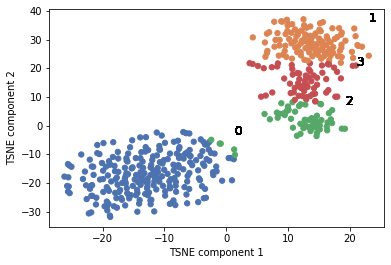

In [8]:
plot_tsne(tsne_proj_df.iloc[:,0:2].values,tsne_proj_df.iloc[:,2]) #,
          # fileName='../../results/Figure/Fig2b.pdf')

### Fig 2c

raw data dim: (262, 16218)
Number of expressed genes a spot must have to be kept (0.01% of total expressed genes) 3375
Marked 3 spots
Removing genes that are expressed in less than 3 spots with a count of at least 1
Dropped 1559 genes


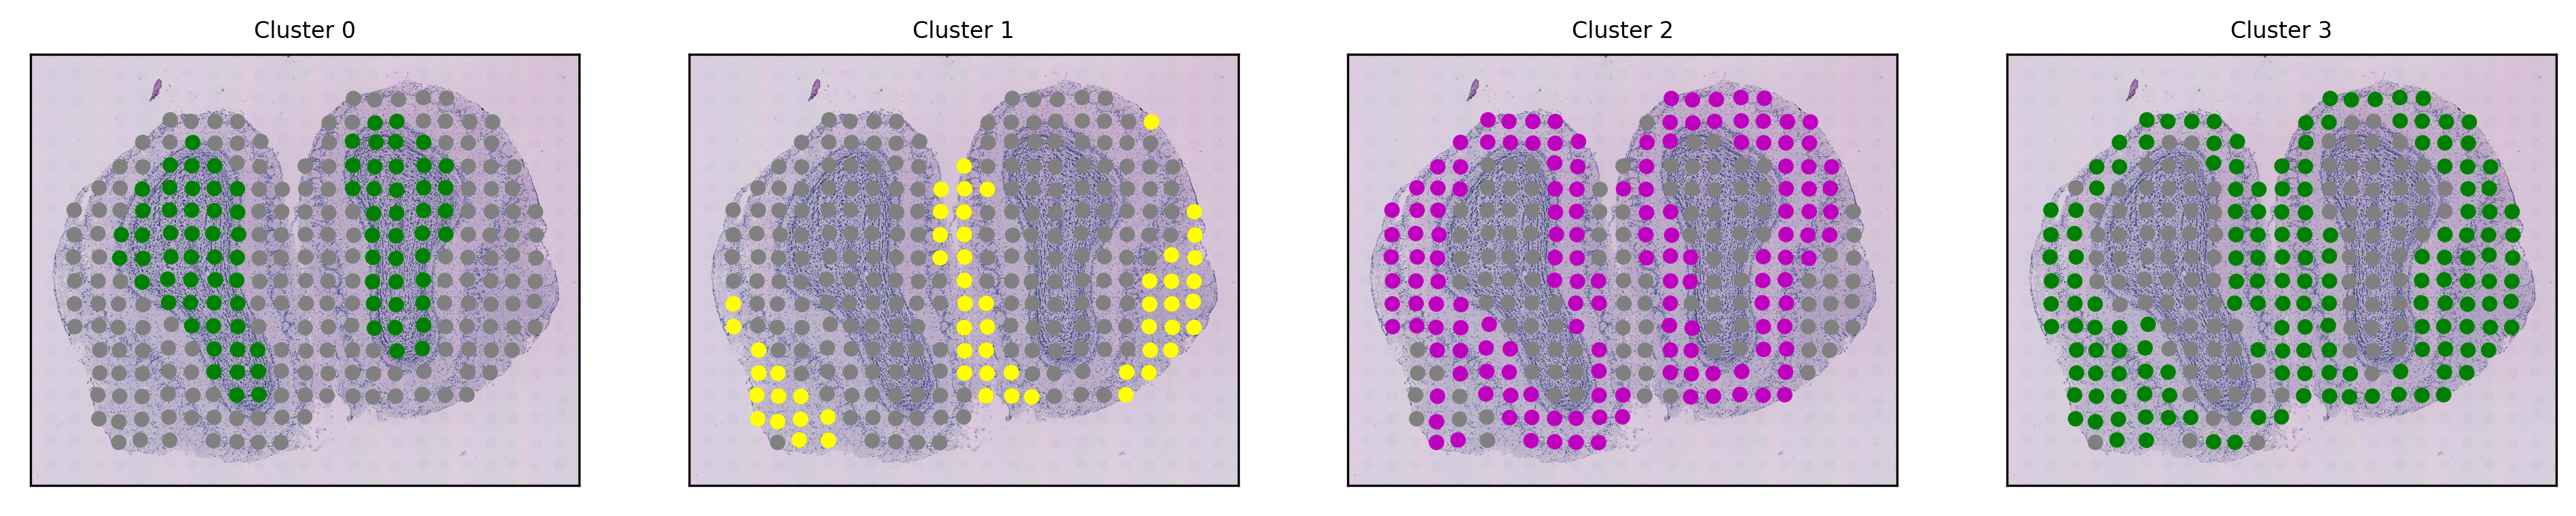

In [13]:
locs, data,_ = read_spatial_expression(
'../../data/Raw_data/MOB-breast_cancer/Rep11_MOB_count_matrix-1.tsv')
data_norm = normalize_count_cellranger(data)

exp= data_norm.iloc[:,0].values
cellGraph= create_graph_with_weight(locs, exp)

ncols=4
fig,ax=plt.subplots(1,ncols,figsize=(ncols*4,1*4),dpi=300)

for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    KMlables,hmrf_labels=create_labels(locs,data_norm,geneList,cellGraph,
                                       cluster_size=2,unary_scale_factor=100,smooth_factor=35)
    if ck==0:              
        colors=['grey',"green"] 
    if ck==1:              
        colors=["grey","yellow"] 
    if ck==2:               
        colors=["grey","m"]
    if ck==3:                
        colors=["green","grey"] 
        
    image='../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep11_MOB.jpg'
    axes=ax[ck]
#     add_HE_image(image,axes)
    title='Cluster {}'.format(ck)
    subplot_HE_with_labels(locs,hmrf_labels,image,axes,colors,title,s=20)
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    

plt.show()    

In [14]:
fig.savefig('../../results/Figure/Fig2c.pdf')

### Fig 2d

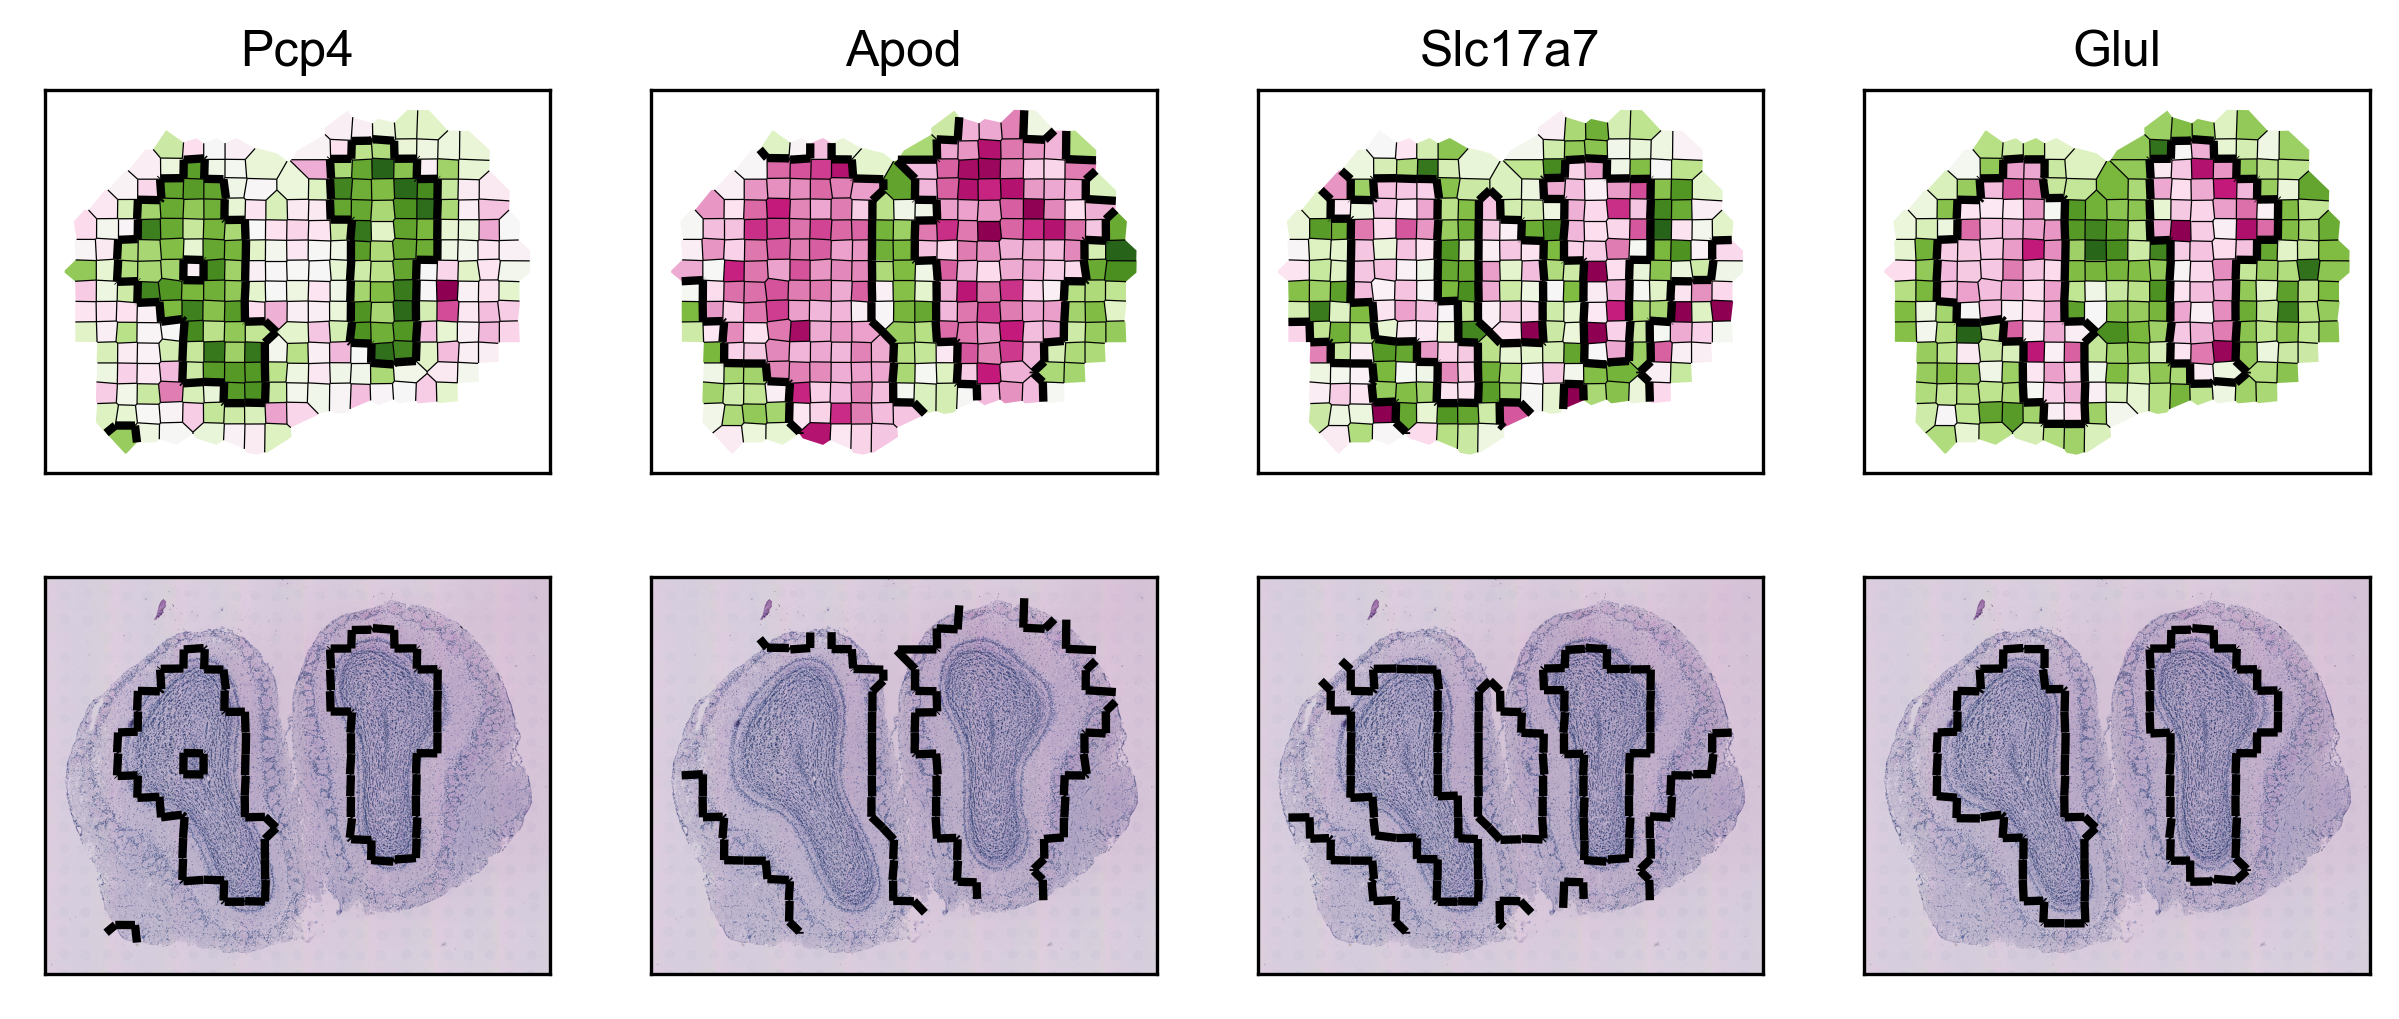

In [15]:
nrows=2
ncols=4
fig,ax=plt.subplots(nrows,ncols,dpi=300,gridspec_kw={"height_ratios":[1,1.15]},figsize=(10,4))
marker_genes = ['Pcp4','Apod','Slc17a7','Glul']
for i,geneID in enumerate(marker_genes):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][5:].astype(int)
    p=gco_df.loc[geneID,'fdr']

    
    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    
    
    axes=ax[1,i]
    image='../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep11_MOB.jpg'
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')
    
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    
#fig.tight_layout()

# plt.savefig('../../results/Figure/Fig2d.pdf')
plt.show()

In [16]:
fig.savefig('../../results/Figure/Fig2d.pdf')